# Separation of 2D ELDOR peaks by SWT
### Author: Aritro Sinha Roy
#### 27 Feb, 2023

In [1]:
# load the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack as sfft

In [2]:
sns.set_theme(context='paper', style='white', palette = 'dark', 
              font='sans-serif', font_scale = 3.2, color_codes = True, rc = None)

# read 2D DQC data
data = pd.read_csv('DTBN_DMPC_100ns_real.txt', sep = ",", header = None)
data.shape

(1024, 64)

In [3]:
# define the time and the frequency domains
t1m, t2m = 30e-3 + 4e-3*64, 1e-3*1024
dim1 = 64; dim2 = 1024;
t1dat, t2dat = np.linspace(30e-3, t1m, dim1), np.linspace(0, t2m, dim2)

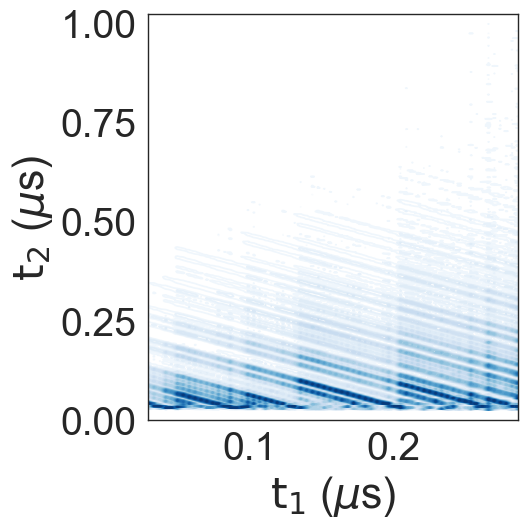

In [4]:
# plot the absolute 2D DQC signal
xval, yval = np.meshgrid(t1dat, t2dat)
zval = data
zval = abs(zval)/abs(zval).max()

_resol = 100 # set resolution
_w1, _h1 = 6, 6 # set image size

fig,ax = plt.subplots(1,1, figsize = (_w1, _h1), dpi = _resol)
g1 = plt.contour(xval, yval, zval, vmax = 1.0, levels = 25, cmap = 'Blues')

ax.set_xlabel(r'$\mathrm{t_1}$ ($\mu$s)')
ax.set_ylabel(r'$\mathrm{t_2}$ ($\mu$s)')

plt.tight_layout()
plt.show()

In [5]:
# calculate 2D FT of the time domain data
dqft = sfft.fftshift(np.fft.fft2(data))
dqft = abs(dqft) / abs(dqft).max()

# define the frequency domain
dim1 = 64; dim2 = 1024;
delf1 = 1/(t1m); 
delf2 = 1/(t2m); 
f1val = np.array([(i - dim1/2.)*delf1 for i in range(1,dim1+1)]) 
f2val = np.array([(j - dim2/2.)*delf2 for j in range(1, dim2+1)])

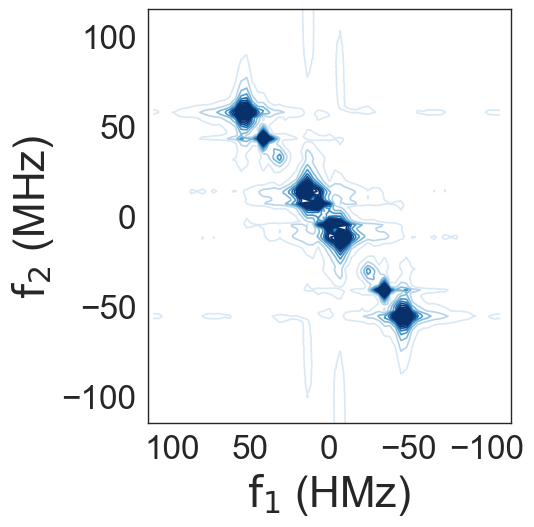

In [6]:
# setup contour plot parameters 
_zoom, _clev = 0.2, 35

# plot the 2DFT magnitude spectrum
f1v, f2v = np.meshgrid(f1val, f2val)

fig,ax = plt.subplots(1,1, figsize = (_w1, _h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_1}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_2}$ (MHz)')
plt.tight_layout()
plt.show()

In [7]:
def fread(fname):
    dat = pd.read_csv(fname, header = None)    
    ft = sfft.fftshift(np.fft.fft2(dat))
    return abs(ft)

### Level-1

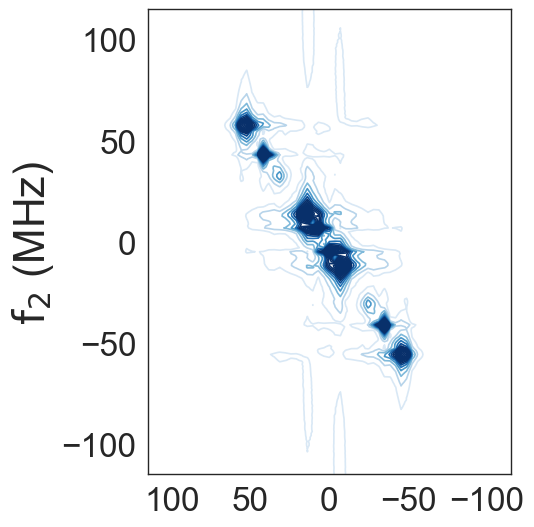

In [8]:
dqft_A1 = fread('eldor_rec_A1.txt') 
_norm = dqft_A1.max() 
dqft_A1 = dqft_A1 / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_A1, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_ylabel(r'$\mathrm{f_2}$ (MHz)')
plt.tight_layout()
plt.show()

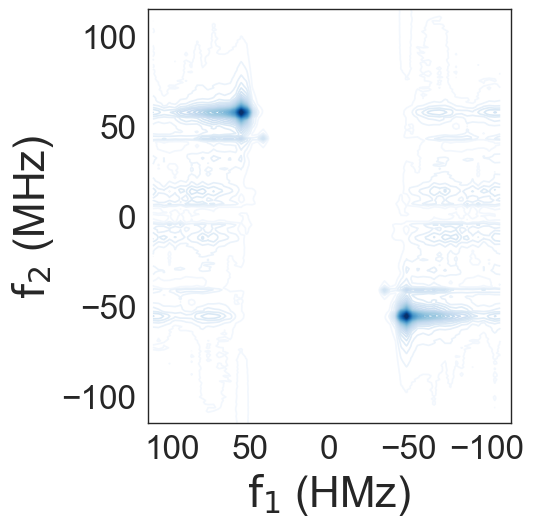

In [9]:
dqft_V1 = fread('eldor_rec_V1.txt') / _norm 

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_V1, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_1}$ (HMz)')
ax.set_ylabel(r'$\mathrm{f_2}$ (MHz)')
plt.tight_layout()
plt.show()

### Level-2

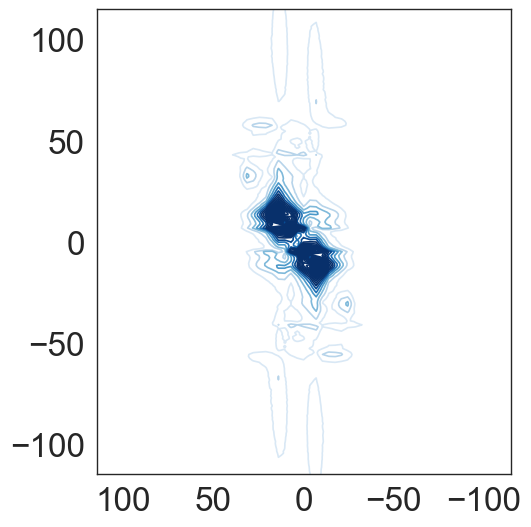

In [10]:
dqft_A2 = fread('eldor_rec_A2.txt') 
_norm = dqft_A2.max() 
dqft_A2 = dqft_A2 / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_A2, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)
plt.tight_layout()
plt.show()

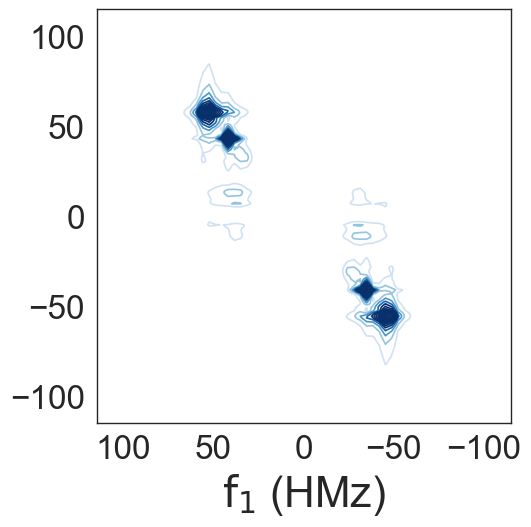

In [11]:
dqft_V2 = fread('eldor_rec_V2.txt') / _norm 

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_V2, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_1}$ (HMz)')

plt.tight_layout()
plt.show()

### Level-3

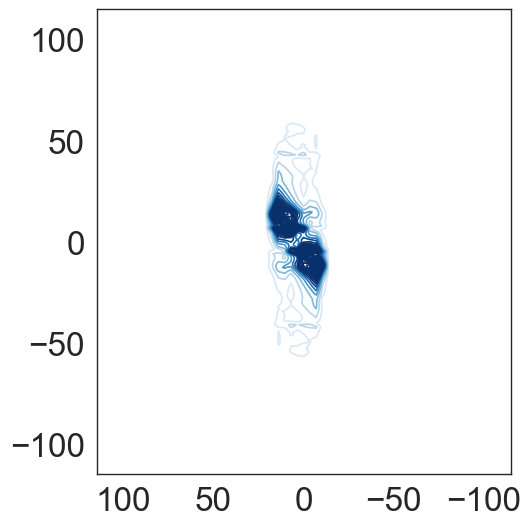

In [12]:
dqft_A3 = fread('eldor_rec_A3.txt') 
_norm = dqft_A3.max() 
dqft_A3 = dqft_A3 / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_A3, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)
plt.tight_layout()
plt.show()

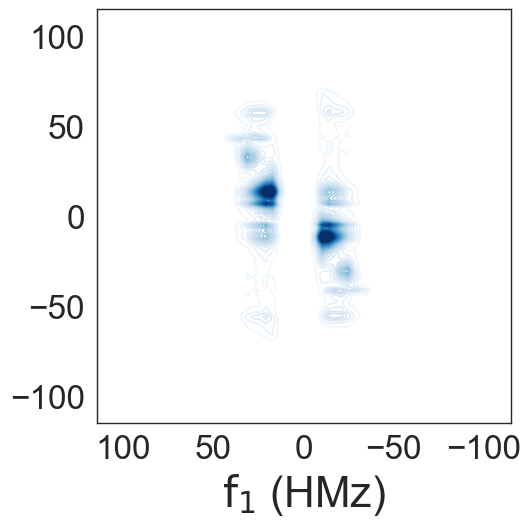

In [13]:
dqft_V3 = fread('eldor_rec_V3.txt') / _norm 

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_V3, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_1}$ (HMz)')

plt.tight_layout()
plt.show()

### Level-4

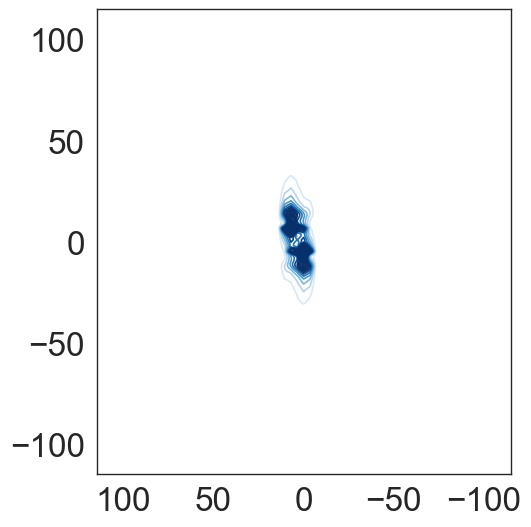

In [14]:
dqft_A4 = fread('eldor_rec_A4.txt') 
_norm = dqft_A4.max() 
dqft_A4 = dqft_A4 / _norm

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_A4, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)

plt.tight_layout()
plt.show()

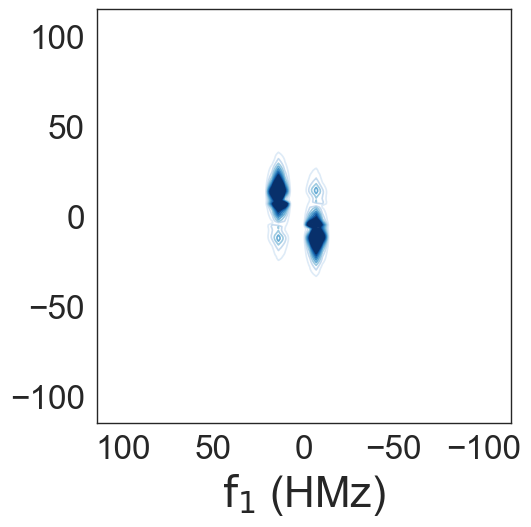

In [15]:
dqft_V4 = fread('eldor_rec_V4.txt') / _norm 

fig,ax = plt.subplots(1,1, figsize = (_w1,_h1), dpi = _resol)
g1 = plt.contour(f1v, f2v, dqft_V4, vmax = _zoom, levels = _clev, cmap = 'Blues')
ax.set(xlim = [115,-115], ylim = [-115, 115], xticks = [-100,-50,0,50,100], yticks = [-100,-50,0,50,100])
ax.tick_params(axis = 'both', labelsize = 24)
ax.set_xlabel(r'$\mathrm{f_1}$ (HMz)')

plt.tight_layout()
plt.show()

### End of file